In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

print("✅ All libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


✅ All libraries imported successfully!


In [13]:
import pandas as pd
import os

# ✅ Check for a real dataset
data_path = "../data/accidents.csv"

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f"✅ Loaded dataset from {data_path} — {df.shape[0]} rows, {df.shape[1]} columns.")
else:
    print("⚠️ No dataset found — generating sample data for testing.")
    import numpy as np
    np.random.seed(42)
    df = pd.DataFrame({
        'weather': np.random.choice(['Clear', 'Rainy', 'Foggy', 'Snowy'], 200),
        'road_type': np.random.choice(['Highway', 'Rural', 'Urban'], 200),
        'vehicle_type': np.random.choice(['Car', 'Motorcycle', 'Truck', 'Bus'], 200),
        'light_condition': np.random.choice(['Daylight', 'Dark'], 200),
        'speed': np.random.randint(30, 120, 200),
        'age_of_driver': np.random.randint(18, 70, 200),
        'accident_severity': np.random.choice([0, 1], 200, p=[0.7, 0.3])
    })



⚠️ No dataset found — generating sample data for testing.


In [3]:
# Check basic info
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n")
print(df.dtypes)
print("\nMissing values:\n")
print(df.isnull().sum())

# View some unique values
for col in df.select_dtypes(include='object').columns:
    print(f"\n{col}: {df[col].unique()[:5]}")


Shape of dataset: (200, 15)

Columns:
 ['Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Area_accident_occured', 'Day_of_week', 'Time_to_accident', 'Lanes_or_Medians', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Number_of_casualties', 'Accident_severity']

Data types:

Age_band_of_driver         object
Sex_of_driver              object
Educational_level          object
Vehicle_driver_relation    object
Driving_experience         object
Type_of_vehicle            object
Area_accident_occured      object
Day_of_week                object
Time_to_accident           object
Lanes_or_Medians           object
Road_surface_type          object
Light_conditions           object
Weather_conditions         object
Number_of_casualties        int32
Accident_severity          object
dtype: object

Missing values:

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
V

In [7]:
# Step 6: Data Preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣  Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoders for later decoding if needed

print("✅ All categorical columns encoded.\n")

# 2️⃣  Split features (X) and target (y)
X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']

print(f"Feature set shape: {X.shape}")
print(f"Target shape: {y.shape}\n")

# 3️⃣  Split data into training & testing sets (80 / 20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split complete:")
print(f"Training set: {X_train.shape}")
print(f"Testing set:  {X_test.shape}\n")

#


✅ All categorical columns encoded.

Feature set shape: (200, 14)
Target shape: (200,)

✅ Data split complete:
Training set: (160, 14)
Testing set:  (40, 14)



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Scaling complete.")


✅ Scaling complete.


✅ Model training complete.

🔹 Model Accuracy: 27.50%

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.37      0.50      0.42        14
           2       0.24      0.27      0.25        15

    accuracy                           0.28        40
   macro avg       0.20      0.26      0.22        40
weighted avg       0.22      0.28      0.24        40



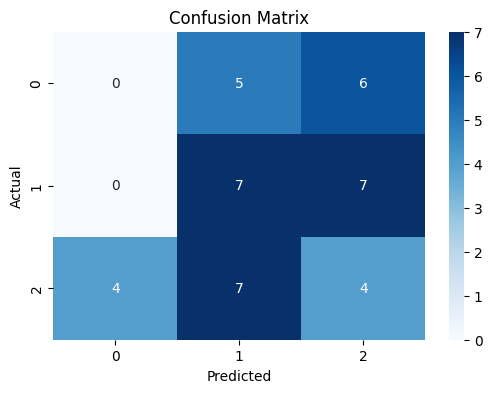

In [10]:
# Step 7: Train and Evaluate Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Initialize and train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

print("✅ Model training complete.\n")

# 2️⃣ Make predictions
y_pred = model.predict(X_test_scaled)

# 3️⃣ Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Model Accuracy: {accuracy * 100:.2f}%\n")

# 4️⃣ Detailed classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 5️⃣ Confusion Matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
# Step 8: Make Real-Time Predictions

import numpy as np
import pandas as pd

# ✅ 1️⃣ Create a new accident record (example input)
new_accident = {
    'Age_band_of_driver': '31-50',
    'Sex_of_driver': 'Male',
    'Educational_level': 'College',
    'Vehicle_driver_relation': 'Owner',
    'Driving_experience': '5-10yr',
    'Type_of_vehicle': 'Car',
    'Area_accident_occured': 'Urban',
    'Day_of_week': 'Friday',
    'Time_to_accident': 'Evening',
    'Lanes_or_Medians': 'Two lanes',
    'Road_surface_type': 'Asphalt',
    'Light_conditions': 'Daylight',
    'Weather_conditions': 'Clear',
    'Number_of_casualties': 2
}

# ✅ 2️⃣ Convert to DataFrame
new_df = pd.DataFrame([new_accident])

# ✅ 3️⃣ Encode using the same label encoders used during training
for col, le in label_encoders.items():
    if col in new_df.columns:
        new_df[col] = le.transform(new_df[col])

# ✅ 4️⃣ Scale the new data using the same scaler
new_scaled = scaler.transform(new_df)

# ✅ 5️⃣ Make prediction
prediction = model.predict(new_scaled)[0]

# ✅ 6️⃣ Decode numeric prediction back to label
predicted_label = label_encoders['Accident_severity'].inverse_transform([prediction])[0]

print("🚦 Predicted Accident Severity:", predicted_label)


🚦 Predicted Accident Severity: Slight Injury


In [12]:
import joblib
import os

# ✅ Create 'models' folder if it doesn't exist
os.makedirs("../models", exist_ok=True)

# ✅ Save trained model
model_path = "../models/road_accident_severity_model.joblib"
joblib.dump(model, model_path)
print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: ../models/road_accident_severity_model.joblib


In [14]:
import joblib
import os

# Create models folder if it doesn't exist
os.makedirs("models", exist_ok=True)

# Save the trained model
joblib.dump(model, "models/accident_severity_model.joblib")

print("✅ Model saved successfully in the models/ folder")


✅ Model saved successfully in the models/ folder
